# machine learning models

## suppervised learning

### single model
- linear model: linear regression, logistic regresssion, Lasso, Ridge
- K-neighbor
- decision tree: ID3, C5.0, CART
- neural networks: perceptron, neural nerwork
- SVM(support vector machines): linearly separable, linearly support, linearly inseparable

### integrated learning
- Boosting: GBDT, Ada Boost, XG Boost, Light GBM, Cat Boost
- Bagging: random forest

## unsuppervised learning

### clustering
- k-means
- hierarchical clustering
- general clustering

### dimensionality reduction
- PCA
- SVD
- LDA

## probability learning

### EM algorithm

### MCMC

### Bayesian
- naive Bayes
- Bayesian networks

### probaility graph
- CRF
- HMM

### maximum entropy model


# 机器学习模型

## 监督学习

### 单模型
- 线性模型：线性回归，逻辑回归，套索回归，岭回归
- k近邻
- 决策树：ID3, C5.0，CART生成树算法
- 神经网络：感知机，神经网络
- 支持向量机：线性可分，线性支持，线性不可分

### 集成学习
- Boosting: GBDT, Ada Boost, XG Boost, Light GBM, Cat Boost
- Bagging: 随机森林

## 无监督学习

### 聚类
- k-means
- 层次聚类
- 谱聚类

### 降维
- PCA
- 奇异值分解
- LDA

## 概率模型

### EM algorithm

### MCMC

### 贝叶斯
- 朴素贝叶斯
- 贝叶斯网络

### 概率图
- CRF
- HMM

### 最大熵模型


# 命名约定
- 变量名，全部小写，尽量英文单词，做到见名知意，单词之间使用下划线分隔
- 函数名，首字母大写，尽量英文单词，单词之间使用下划线分隔
- 类名，首字母大写，尽量英文单词，单词之间不需要使用下划线分隔
- 在此中可能使用一些常见的算法的缩写以及约定俗成的写法, 例如，梯度下降算法 GD，不需要的变量 _


X_train shape =  (353, 10)
X_test shape =  (89, 10)
y_train shape =  (353, 1)
y_test shape =  (89, 1)
X_train data =  [[ 0.04534099 -0.04464164 -0.00620595 -0.01599922  0.1250187   0.1251981
   0.019187    0.03430886  0.03243323 -0.0052198 ]
 [ 0.09256399 -0.04464164  0.03690653  0.02187235 -0.02496016 -0.01665815
   0.00077881 -0.03949338 -0.02251217 -0.02178823]
 [ 0.06350368  0.05068012 -0.00405033 -0.01255635  0.10300346  0.04878988
   0.05600338 -0.00259226  0.08449528 -0.01764612]
 [ 0.09619652 -0.04464164  0.0519959   0.07925353  0.05484511  0.03657709
  -0.07653558  0.1413221   0.09864637  0.06105391]
 [ 0.01264814  0.05068012 -0.02021751 -0.00222774  0.03833367  0.05317396
  -0.00658447  0.03430886 -0.00514531 -0.00936191]]
y_train data =  [[ 0.04534099 -0.04464164 -0.00620595 -0.01599922  0.1250187   0.1251981
   0.019187    0.03430886  0.03243323 -0.0052198 ]
 [ 0.09256399 -0.04464164  0.03690653  0.02187235 -0.02496016 -0.01665815
   0.00077881 -0.03949338 -0.02251217 -0.02

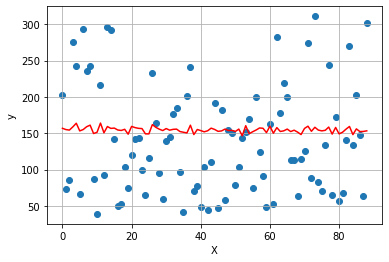

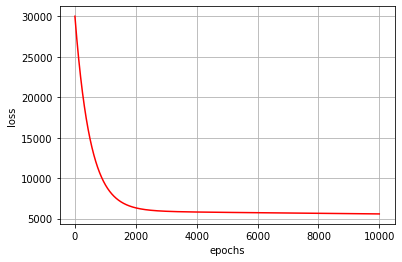

In [5]:
# 导入 numpy 模块，矩阵计算
import numpy as np

# 从 scikit-learn 中选择数据集 diabetes
from sklearn.datasets import load_diabetes

# 使用 scikit-learn 的 shuffle 功能，打乱数据集
from sklearn.utils import shuffle

# 利用 matplotlib 进行可视化操作
import matplotlib.pyplot as plt
# jupyter notebook 中嵌入 matplotlib 绘制的图形
%matplotlib inline

"""
# 定义函数，用于数据准备
# 1、加载数据集
# 2、将数据集打乱无序
# 3、数据集划分训练集 train 和测试集 test
# 4、查看数据集维度情况以及基本信息
"""
def Data_Processing():
    # 加载数据集
    diabetes = load_diabetes()
    # 获取数据矩阵 X
    data = diabetes.data
    # 或者数据标签值
    target = diabetes.target
    
    # 洗牌，打乱数据集
    X, y = shuffle(data, target, random_state=42)
    # 将 数据矩形 X 中数据类型设置为 numpy float32
    X = X.astype(np.float32)
    
    # 划分数据集为 训练集 train，测试集 test
    # train : test = 8 : 2
    split_size = int(X.shape[0] * 0.8)
    # 使用切片完成简单划分
    X_train, y_train = X[:split_size], y[:split_size]
    X_test, y_test = X[split_size:], y[split_size:]
    
    # 标签值 y 的维度变换
    # [n] => [n, 1]
    y_train = y_train.reshape((-1, 1))
    y_test = y_test.reshape((-1, 1))
    
    # 查看数据维度信息，以及基本信息
    print("X_train shape = ", X_train.shape)
    print("X_test shape = ", X_test.shape)
    print("y_train shape = ", y_train.shape)
    print("y_test shape = ", y_test.shape)
    
    print("X_train data = ", X_train[:5])    
    print("y_train data = ", X_train[:5])
    
    return X_train, y_train, X_test, y_test

"""
# 定义函数，初始化模型超参数 权重系数 w，偏置或者截距 b
# inputs：数据集维度 n，w需要与数据集进行矩阵乘法
# outputs：权重系数 w，偏置或者截距 b
"""
def Initialize_Hyperparams(dims):
    # w 必须创建为能与数据集 X 进行乘法运算的矩阵
    # 超参数初始化有多种方式
    # 将 w 和 b 全部初始化为 零
    w = np.zeros((dims, 1))
    b = 0
    
    return w, b

"""
# 定义函数，实现 线性模型 核心算法
# inputs：X 矩阵，标签值 y，权重系数 w，偏置或者截距 b
# outputs：预测值 y_hat，误差 loss，权值偏导数 dw，偏置偏导数 db
"""
def Linear_Model(X, y, w, b):
    # 获取数据矩阵 X 的行和列，也就是数据记录，以及特征
    train_num = X.shape[0]
    feature_num = X.shape[1]
    
    # 线性模型，数学公式 y_hat = X @ w + b
    y_hat = np.dot(X, w) + b
    
    # 损失函数计算，loss = (y - y_hat)**2
    loss = np.sum((y_hat - y) **2) / train_num 
    
    # 偏导数计算，数学公式
    dw = np.dot(X.T, (y_hat - y)) / train_num
    db = np.sum((y_hat - y)) / train_num
    
    return y_hat, loss, dw, db

"""
# 定义函数，使用GD梯度下降算法进行训练线性模型
# inputs：数据集 X 矩阵，标签值 y，学习率或者梯度下降步长 learning_rate，对数据训练次数 epochs
# outputs：每一次训练后的误差值列表 loss_list，最后一次训练误差 loss，最终线性模型参数 params，最终梯度值或者偏导数 grads
"""
def Linear_Train_GD(X, y, learning_rate, epochs):
    # 初始化线性模型超参数
    w, b = Initialize_Hyperparams(X.shape[1])
    # 创建列表，储存每次训练误差
    loss_list = []
    
    # 对数据集进行多次训练
    for i in range(epochs):
        # 训练线性模型
        y_hat, loss, dw, db = Linear_Model(X, y, w, b)
        # 将误差加入列表中
        loss_list.append(loss)
        
        # 梯度下降算法，优化算法，找到最优解
        # 更新梯度
        w += -learning_rate * dw
        b += -learning_rate * db
        
        # 每训练 1000 次，查看一下训练误差
        if i % 1000 == 0:
            print("epoch {} , loss {} , ".format(i, loss))
            
    # 训练结束后，保存训练后需要的信息
    # 保存模型超参数，字典形式储存
    params = {"w" : w, "b" : b}
    # 保存梯度信息，字典形式储存
    grads = {"dw" : dw, "db" : db}
        
    return loss_list, loss, params, grads

"""
# 定义函数，使用训练后的参数线性模型进行预测
# inputs：数据集 X 矩阵，模型超参数 params
# outputs：线性模型预测值矩阵 y_predict
"""
def Linear_Model_Predict(X, params):
    # 获取训练好的模型的超参数
    w = params["w"]
    b = params["b"]
    
    # 使用训练好的模型进行预测
    y_predict = np.dot(X, w) + b
    
    return y_predict

"""
# 定义函数，可视化测试集的真实值和预测值
# inputs：数据集 X 矩阵，模型超参数 params
# outputs：线性模型预测值矩阵 y_predict
"""
def Test_Visualization(X_test, y_test, params):
    # 预测曲线函数
    predict_function = X_test.dot(params["w"]) + params["b"]
    
    # 绘制 测试集 test 的数据点
    plt.scatter(range(X_test.shape[0]), y_test)
    # 绘制预测曲线,拟合数据情况
    plt.plot(predict_function, color = "red")
    
    # 设置图形的基本信息
    plt.xlabel("X")
    plt.ylabel("y")
    plt.grid()
    plt.show()
    
"""
# 定义函数，可视化训练过程中损失误差 loss 下降过程
# inputs：数据集 X 矩阵，模型超参数 params
# outputs：线性模型预测值矩阵 y_predict
"""
def Loss_Visualization(loss_list):
    # 绘制 loss 下降过程，查看训练情况
    plt.plot(loss_list, color = "red")
    
    # 设置图形的基本信息
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.grid()
    plt.show()
    
"""
# 定义主函数，完成线性模型算法的整个流程处理
# 0、数据准备
# 1、训练模型
# 2、在测试集 test 上进行预测
# 3、可视化
"""
def main():
    # 数据准备
    X_train, y_train, X_test, y_test = Data_Processing()
    
    # 训练模型
    loss_list, loss, params, _ = Linear_Train_GD(X_train, y_train, 1e-3, 10000)
    
    # 测试集数据进行预测
    y_predict = Linear_Model_Predict(X_test, params)
    
    # 可视化测试集的真实值和预测值
    Test_Visualization(X_test, y_test, params)
    
    # 可视化训练过程中损失误差 loss 下降过程
    Loss_Visualization(loss_list)
    


# 执行所有代码
# if __name__ == "__main__":
#     main()
main()

In [ ]:
# 导入 numpy 模块，矩阵计算
import numpy as np

# 利用 matplotlib 进行可视化操作
import matplotlib.pyplot as plt
# jupyter notebook 中嵌入 matplotlib 绘制的图形
%matplotlib inline


def sigmoid(x):
    z = 1 / (1 + np.exp(-x))
    return z

def initialize_params(dims):
    W = np.zeros((dims, 1))
    b = 0
    return W, b

def logistic(X, y, W, b):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    
    a = sigmoid(np.dot(X, W) + b)
    cost = -1 / num_train * np.sum(y * np.log(a) + (1 - y)* np.log(1-a))
    
    dW = np.dot(X.T, (a-y)) / num_train
    db = np.sum(a-y) / num_train
    cost = np.squeeze(cost)
    
    return a, cost, dW, db

def logistic_train(X, y, learning_rate, epochs):
    W, b = initialize_params(X.shape[1])
    cost_list = []
    
    for i in range(epochs):
        a, cost, dW, db = logistic(X, y, W, b)
        
        W = W - learning_rate * dW
        b = b - learning_rate * db
        
        if i % 100 == 0:
            cost_list.append(cost)
            
        if i % 100 == 0:
            print("epoch %d cost %f" % (i, cost))
            
    params = {"W" : W, "b" : b}
    grads = {"dW" : dW, "db" : db}
    
    return cost_list, params, grads

def predict(X, params):
    y_prediction = sigmoid(np.dot(X, params['W']) + params['b'])
    
    for i in range(len(y_prediction)):
        if y_prediction[i] > 0.5:
            y_prediction[i] = 1
        else:
            y_prediction[i] = 0
    return y_prediction


from sklearn.datasets.samples_generator import make_classification

X, labels = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=42, n_clusters_per_class=2)
rng = np.random.RandomState(42)
X += 2 * rng.uniform(size=X.shape)

unique_lables = set(labels)

colors = plt.cm.Spctral(np.linspace(0, 1, lean(unique_lables)))

for k, col in zip(unique_lables, colors):
    x_k = X[labels==k]
    plt.plot(x_k[:, 0], x_k[:, 1], 'o', markerfacecolor=col, markeredgecolor="k", markersize=14)
    
plt.title("data by make_classification()")
plt.grid()
plt.show()

